---
# 3.2 Bisection method
---

Suppose $f \in C[a,b]$ and that $f(a)$ and $f(b)$ have opposite signs; i.e.,

$$
f(a) \cdot f(b) < 0.
$$

Recall the following important theorem from calculus.

> ### Intermediate Value Theorem
>
> If $f \in C[a,b]$ and $f(a) \leq s \leq f(b)$, then there exists a real number $c \in [a,b]$ such that $f(c) = s$.

Since $f$ changes sign over $[a,b]$, the Intermediate Value Theorem implies that there is some $x^* \in [a,b]$ such that $f(x^*) = 0$.

The **bisection method** searches for a root of $f$ in $[a,b]$ as follows.

1. Let $p = (a+b)/2$ be the **midpoint** of $[a,b]$.
2. If $f(a) \cdot f(p) < 0$, then there is a root in $[a,p]$.
3. If $f(a) \cdot f(p) = 0$, then $p$ is a root.
4. If $f(a) \cdot f(p) > 0$, then there is a root in $[p,b]$.

Each time we apply the above, we get a subinterval that contains a root that is **half the size** of the interval $[a,b]$.

In [13]:
using Printf

# Code the bisection method

function bisect(f, a, b; maxiters=1000, tol=eps())
    fa, fb = f(a), f(b)
    
    for i in 1:maxiters
        p = (a + b)/2
        fp = f(p)

        if abs(fp) < tol
            @printf("Found a root after %d iterations.", i)
            break
        end
        
        if fa*fp < 0
            b, fb = p, fp
        else
            a, fa = p, fp
        end
    end

    return (a+b)/2
end

f(x) = 2cosh(x/4) - x
a, b = 5.0, 10.0

p = bisect(f, a, b, tol=1e-6)


Found a root after 20 iterations.

8.50719928741455

---

### Example

We will now use the above `bisect` function to find the root of

$$
f(x) = 2 \cosh(x/4) - x
$$

that lies in the interval $[5,10]$.

In [15]:
f(x) = 2cosh(x/4) - x
a, b = 5.0, 10.0

p = bisect(f, a, b, tol=0.0)
p, f(p)

(8.507199570713027, 1.7763568394002505e-15)

In [16]:
eps()

2.220446049250313e-16

---

### Example

Let's try to find the value of $y_0$ such that the solution $y(t)$ of the ordinary differential equation 

$$
\frac{dy}{dt} = t - 5 + \frac{y^2}{100}
$$

with initial value $y(0) = y_0$ satisfies $y(10) = 20$.

In [17]:
using OrdinaryDiffEq  # Package for solving ordinary differential equations
using Plots, LaTeXStrings

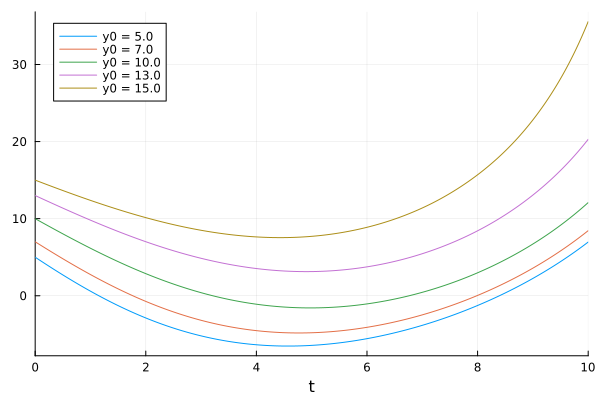

In [31]:
f(y, p, t) = t - 5 + y^2/100

function foo(y0)
    tspan = (0.0, 10.0)
    prob = ODEProblem(f, y0, tspan)
    sol = solve(prob, Tsit5())
end

initial_values = [5.0, 7.0, 10.0, 13.0, 15.0]
plot()
for y0 in initial_values
    sol = foo(y0)
    plot!(sol, label="y0 = $(y0)")
end
plot!()

In [33]:
function g(y0)
    sol = foo(y0)
    return sol(10.0) - 20.0
end

# We want to find y0 such that g(y0) = 0
@show g(13.0)

p = bisect(g, 10.0, 15.0)
p, g(p)

g(13.0) = 0.29427087230386206


(12.932932907322332, 1.7763568394002505e-14)

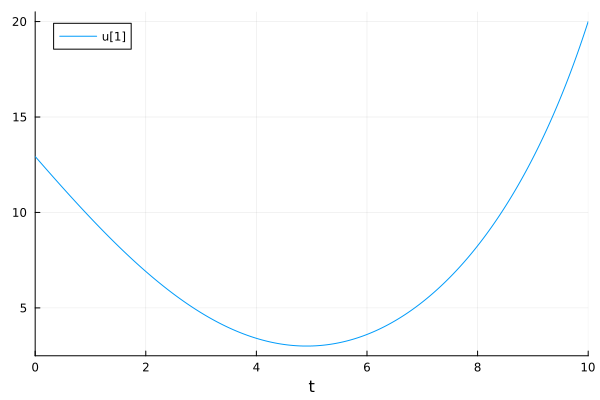

In [34]:
sol = foo(p)
plot(sol)

---

## Analyzing the bisection method

Initially, we know a root $x^*$ is somewhere in the interval $[a,b]$. If we let $x_k$ be the midpoint of the $k$th subinterval, then

$$\left|x^* - x_0\right| \leq \frac{b-a}{2}.$$

In the next iteration, 

$$\left|x^* - x_1\right| \leq \frac{b-a}{4},$$

and in the following iteration,

$$\left|x^* - x_2\right| \leq \frac{b-a}{8},$$

and so on, each time reducing our error bound by a factor of $2$.

In general,

$$\left|x^* - x_k\right| \leq \frac{b-a}{2} \cdot 2^{-k}, 
\qquad \text{for $k = 0,1,2,\ldots$}.$$

Suppose we want to compute $x_k$ such that 

$$\left|x^* - x_k\right| \leq \mathtt{atol}.$$

Then we just need to find the smallest positive integer $k$ such that

$$\frac{b-a}{2} \cdot 2^{-k} \leq \mathtt{atol}.$$

That is,

$$\frac{b-a}{2\mathtt{atol}} \leq 2^k,$$

which gives us

$$\log_2\left(\frac{b-a}{2\mathtt{atol}}\right) \leq k,$$

so we just need the first integer $k$ that is larger than $\log_2\left(\frac{b-a}{2\mathtt{atol}}\right)$. Therefore, 

$$k = \left\lceil \log_2\left(\frac{b-a}{2\mathtt{atol}}\right) \right\rceil.$$

In [35]:
atol = eps()
a, b = 8.0, 11.0
k = ceil(log2((b-a)/2atol))

53.0

---

## Pros and cons of the bisection method

Pros:

1. **Simple:** The bisection method only requires function values, is easy to understand and implement, and it is easy to analyze.

2. **Robust:** The bisection method is guaranteed to work, provided that $f$ is continuous and changes sign on the interval $[a,b]$.

Cons:

1. **Slow to converge:** The bisection method often requires many function evaluations.

2. **Does not generalize:** The bisection method only applies to solving equations involving one variable; it does not generalize to solving equations involving multiple variables.



---

In [41]:
using Roots

In [42]:
??find_zero

search: find_zero find_zeros iszero finalizer findprev fzero findnext



```
find_zero(f, x0, M, [N::AbstractBracketingMethod], [p=nothing]; kwargs...)
```

Interface to one of several methods for finding zeros of a univariate function, e.g. solving $f(x)=0$.

# Arguments

## Positional arguments

  * `f`: the function (univariate or `f(x,p)` with `p` holding parameters)
  * `x0`: the initial condition (a value, initial values, or bracketing interval)
  * `M`: some `AbstractUnivariateZeroMethod` specifying the solver
  * `N`: some bracketing method, when specified creates a hybrid method
  * `p`: for specifying a parameter to `f`. Also can be a keyword, but a positional argument is helpful with broadcasting.

## Keyword arguments

  * `xatol`, `xrtol`: absolute and relative tolerance to decide if `xₙ₊₁ ≈ xₙ`
  * `atol`, `rtol`: absolute and relative tolerance to decide if `f(xₙ) ≈ 0`
  * `maxiters`: specify the maximum number of iterations the algorithm can take.
  * `verbose::Bool`: specifies if details about algorithm should be shown
  * `tracks`: allows specification of `Tracks` objects

# Extended help

# Initial starting value

For most methods, `x0` is a scalar value indicating the initial value in the iterative procedure. (Secant methods can have a tuple specify their initial values.) Values must be a subtype of `Number` and have methods for `float`, `real`, and `oneunit` defined.

For bracketing intervals, `x0` is specified using a tuple, a vector, or any iterable with `extrema` defined. A bracketing interval, $[a,b]$, is one where $f(a)$ and $f(b)$ have different signs.

# Return value

If the algorithm succeeds, the approximate root identified is returned. A `ConvergenceFailed` error is thrown if the algorithm fails. The alternate form `solve(ZeroProblem(f,x0), M)` returns `NaN` in case of failure.

# Specifying a method

A method is specified to indicate which algorithm to employ:

  * There are methods where a bracket is specified: [`Bisection`](@ref), [`A42`](@ref), [`AlefeldPotraShi`](@ref), [`Roots.Brent`](@ref), among others. Bisection is the default for basic floating point types, but `A42` generally requires far fewer iterations.
  * There are several derivative-free methods: cf. [`Order0`](@ref), [`Order1`](@ref) (also [`Roots.Secant`](@ref)), [`Order2`](@ref) (also [`Steffensen`](@ref)), [`Order5`](@ref), [`Order8`](@ref), and [`Order16`](@ref), where the number indicates the order of the convergence.
  * There are some classical methods where derivatives need specification: [`Roots.Newton`](@ref), [`Roots.Halley`](@ref), [`Roots.Schroder`](@ref), among others.
  * Methods intended for problems with multiplicities include [`Roots.Order1B`](@ref), [`Roots.Order2B`](@ref), and `Roots.ThukralXB` for different `X`s.
  * The family [`Roots.LithBoonkkampIJzerman{S,D}`](@ref) ,for different `S` and `D`, uses a linear multistep method root finder. The `(2,0)` method is the secant method, `(1,1)` is Newton's method.

For more detail, see the help page for each method (e.g., `?Order1`). Non-exported methods must be qualified with the module name, as in `?Roots.Schroder`.

If no method is specified, the default method depends on `x0`:

  * If `x0` is a scalar, the default is the more robust `Order0` method.
  * If `x0` is a tuple, vector, or iterable with `extrema` defined indicating a *bracketing* interval, then the `Bisection` method is used for `Float64`, `Float32` or `Float16` types; otherwise the `A42` method is used.

The default methods are chosen to be robust; they may not be as efficient as some others.

# Specifying the function

The function(s) are passed as the first argument.

For the few methods that use one or more derivatives (`Newton`, `Halley`, `Schroder`, `LithBoonkkampIJzerman(S,D)`, etc.) a tuple of functions is used. For the classical algorithms, a function returning `(f(x), f(x)/f'(x), [f'(x)/f''(x)])` may be used.

# Optional arguments (tolerances, limit evaluations, tracing)

  * `xatol` - absolute tolerance for `x` values.
  * `xrtol` - relative tolerance for `x` values.
  * `atol`  - absolute tolerance for `f(x)` values.
  * `rtol`  - relative tolerance for `f(x)` values.
  * `maxiters`   - limit on maximum number of iterations.
  * `strict` - if `false` (the default), when the algorithm stops, possible zeros are checked with a relaxed tolerance.
  * `verbose` - if `true` a trace of the algorithm will be shown on successful completion. See the internal [`Roots.Tracks`](@ref) object to save this trace.

See the help string for `Roots.assess_convergence` for details on convergence. See the help page for `Roots.default_tolerances(method)` for details on the default tolerances.

In general, with floating point numbers, convergence must be understood as not an absolute statement. Even if mathematically `α` is an answer and `xstar` the floating point realization, it may be that `f(xstar) - f(α)  ≈ xstar ⋅  f'(α) ⋅ eps(α)`, so the role of tolerances must be appreciated, and at times specified.

For the `Bisection` methods, convergence is guaranteed over `Float64` values, so the tolerances are set to be $0$ by default.

If a bracketing method is passed in after the method specification, then whenever a bracket is identified during the algorithm, the method will switch to the bracketing method to identify the zero. (Bracketing methods are mathematically guaranteed to converge, non-bracketing methods may or may not converge.)  This is what `Order0` does by default, with an initial secant method switching to the `AlefeldPotraShi` method should a bracket be encountered.

Note: The order of the method is hinted at in the naming scheme. A scheme is order `r` if, with `eᵢ = xᵢ - α`, `eᵢ₊₁ = C⋅eᵢʳ`. If the error `eᵢ` is small enough, then essentially the error will gain `r` times as many leading zeros each step. However, if the error is not small, this will not be the case. Without good initial guesses, a high order method may still converge slowly, if at all. The `OrderN` methods have some heuristics employed to ensure a wider range for convergence at the cost of not faithfully implementing the method, though those are available through unexported methods.

# Examples:

Default methods.

```jldoctest find_zero
julia> using Roots

julia> find_zero(sin, 3)  # use Order0()
3.141592653589793

julia> find_zero(sin, (3,4)) # use Bisection()
3.141592653589793
```

Specifying a method,

```jldoctest find_zero
julia> find_zero(sin, (3,4), Order1())            # can specify two starting points for secant method
3.141592653589793

julia> find_zero(sin, 3.0, Order2())              # Use Steffensen method
3.1415926535897936

julia> find_zero(sin, big(3.0), Order16())        # rapid convergence
3.141592653589793238462643383279502884197169399375105820974944592307816406286198

julia> find_zero(sin, (3, 4), A42())              # fewer function calls than Bisection(), in this case
3.141592653589793

julia> find_zero(sin, (3, 4), FalsePosition(8))   # 1 of 12 possible algorithms for false position
3.141592653589793

julia> find_zero((sin,cos), 3.0, Roots.Newton())  # use Newton's method
3.141592653589793

julia> find_zero((sin, cos, x->-sin(x)), 3.0, Roots.Halley())  # use Halley's method
3.141592653589793
```

Changing tolerances.

```jldoctest find_zero
julia> fn = x -> (2x*cos(x) + x^2 - 3)^10/(x^2 + 1);

julia> x0, xstar = 3.0,  2.9947567209477;

julia> fn(find_zero(fn, x0, Order2())) <= 1e-14  # f(xₙ) ≈ 0, but Δxₙ can be largish
true

julia> find_zero(fn, x0, Order2(), atol=0.0, rtol=0.0) # error: x_n ≉ x_{n-1}; just f(x_n) ≈ 0
ERROR: Roots.ConvergenceFailed("Algorithm failed to converge")
[...]

julia> fn = x -> (sin(x)*cos(x) - x^3 + 1)^9;

julia> x0, xstar = 1.0,  1.112243913023029;

julia> isapprox(find_zero(fn, x0, Order2()), xstar; atol=1e-4)
true

julia> find_zero(fn, x0, Order2(), maxiters=3)    # need more steps to converge
ERROR: Roots.ConvergenceFailed("Algorithm failed to converge")
[...]
```

# Tracing

Passing `verbose=true` will show details on the steps of the algorithm. The `tracks` argument allows the passing of a [`Roots.Tracks`](@ref) object to record the values of `x` and `f(x)` used in the algorithm.

!!! note
    See [`solve!`](@ref) and [`ZeroProblem`](@ref) for an alternate interface.

